In [1]:
%matplotlib inline


# Multiway canonical correlation analysis (mCCA)

Find a set of components which are shared between different datasets.

Uses meegkit.cca.mmca()


In [2]:
import matplotlib.pyplot as plt
import numpy as np

from meegkit import cca

rng = np.random.default_rng(5)

## First example
We create 3 uncorrelated data sets. There should be no common structure
between them.



Build data



In [3]:
x1 = rng.standard_normal((10000, 10))
x2 = rng.standard_normal((10000, 10))
x3 = rng.standard_normal((10000, 10))
x = np.hstack((x1, x2, x3))
C = np.dot(x.T, x)
print(f"Aggregated data covariance shape: {C.shape}")

Aggregated data covariance shape: (30, 30)


Apply CCA



In [4]:
[A, score, AA] = cca.mcca(C, 10)
z = x.dot(A)

Plot results



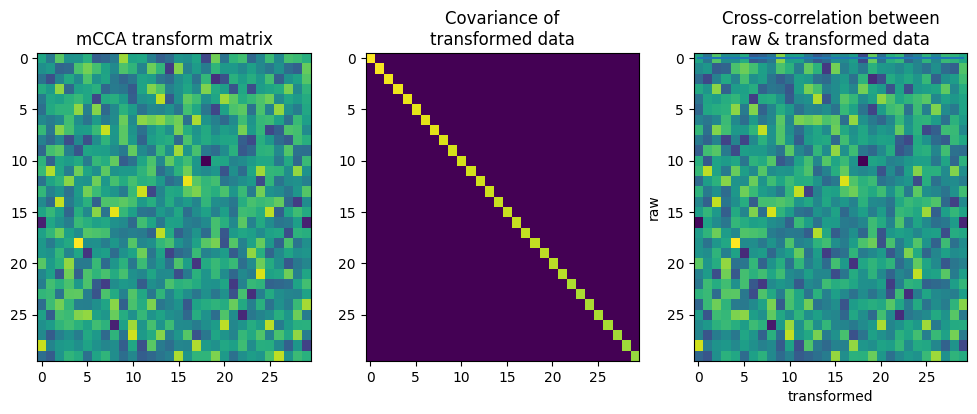

In [5]:
f, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(A, aspect="auto")
axes[0].set_title("mCCA transform matrix")
axes[1].imshow(A.T.dot(C.dot(A)), aspect="auto")
axes[1].set_title("Covariance of\ntransformed data")
axes[2].imshow(x.T.dot(x.dot(A)), aspect="auto")
axes[2].set_title("Cross-correlation between\nraw & transformed data")
axes[2].set_xlabel("transformed")
axes[2].set_ylabel("raw")
plt.plot(np.mean(z ** 2, axis=0))
plt.show()

## Second example
Now Create 3 data sets with some shared parts.



Build data



In [6]:
x1 = rng.standard_normal((10000, 5))
x2 = rng.standard_normal((10000, 5))
x3 = rng.standard_normal((10000, 5))
x4 = rng.standard_normal((10000, 5))
x = np.hstack((x2, x1, x3, x1, x4, x1))
C = np.dot(x.T, x)
print(f"Aggregated data covariance shape: {C.shape}")

Aggregated data covariance shape: (30, 30)


Apply mCCA



In [7]:
A, score, AA = cca.mcca(C, 10)

Plot results



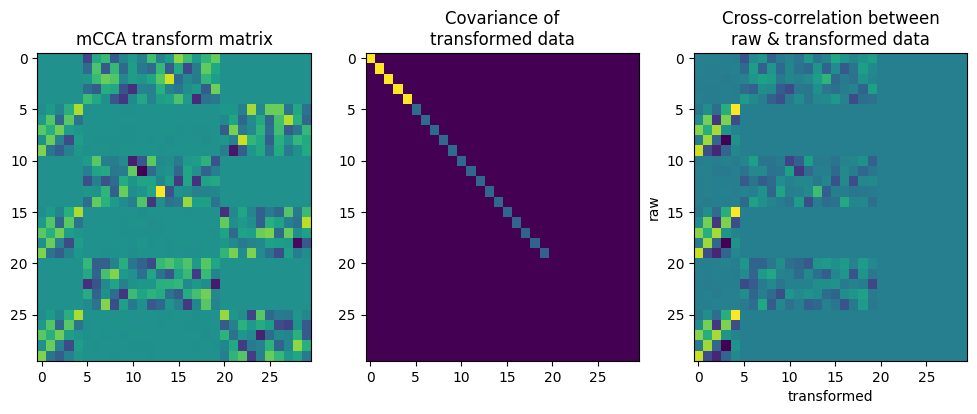

In [8]:
f, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(A, aspect="auto")
axes[0].set_title("mCCA transform matrix")
axes[1].imshow(A.T.dot(C.dot(A)), aspect="auto")
axes[1].set_title("Covariance of\ntransformed data")
axes[2].imshow(x.T.dot(x.dot(A)), aspect="auto")
axes[2].set_title("Cross-correlation between\nraw & transformed data")
axes[2].set_xlabel("transformed")
axes[2].set_ylabel("raw")
plt.show()

## Third example
Finally let's create 3 identical 10-channel data sets. Only 10 worthwhile
components should be found, and the transformed dataset should perfectly
explain all the variance (empty last two block-columns in the
cross-correlation plot).



Build data



In [9]:
x1 = rng.standard_normal((10000, 10))
x = np.hstack((x1, x1, x1))
C = np.dot(x.T, x)
print(f"Aggregated data covariance shape: {C.shape}")

Aggregated data covariance shape: (30, 30)


Compute mCCA



In [10]:
A, score, AA = cca.mcca(C, 10)

Plot results



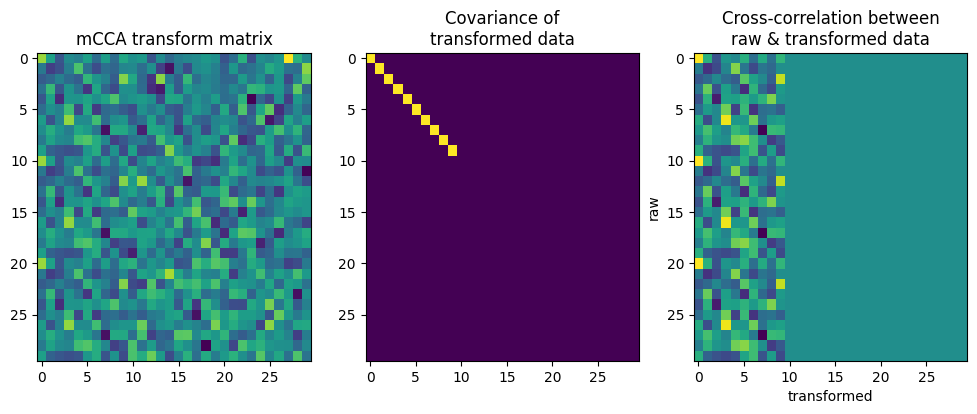

In [11]:
f, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(A, aspect="auto")
axes[0].set_title("mCCA transform matrix")
axes[1].imshow(A.T.dot(C.dot(A)), aspect="auto")
axes[1].set_title("Covariance of\ntransformed data")
axes[2].imshow(x.T.dot(x.dot(A)), aspect="auto")
axes[2].set_title("Cross-correlation between\nraw & transformed data")
axes[2].set_xlabel("transformed")
axes[2].set_ylabel("raw")
plt.show()